In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

# our library
from sat_metropolis import mcmc, models, utils

In [2]:
# experiment setup
bound = 12
reduction_factor = 4
max_int_bv = 2**6-1

In [3]:
(s, num_vars) = models.get_books_smt(bound=bound, y_reduction_factor=reduction_factor, max_int=max_int_bv)

In [4]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='megasampler', z3_problem=s, timeout_sampler=60*10)

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 156
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 72
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler
Formula is satisfiable
MAX-SMT returned 'unknown' (timeout?)
MAX-SMT returned 'unknown' (timeout?)
Stopping: timeout
---------SOLVING STATISTICS--------
do_epoch time: 291.782
epoch time: 599.999
grow_seed time: 7.32973
initial_solving time: 0.0260047
output time: 0.193647
start_epoch time: 308.206
total time: 600.033
Epochs: 9044
MAX-SMT calls: 9045
SMT calls: 2
Assignments considered (with repetitions): 922488
Models (with repetitions): 922488
Unique models (# samples in file): 8979
-----------------------------------
The parameter `solver_samples` only contains 8979 samples. Thus, every chain will contain 8979 instead of 8979. Try running the SAT/SMT sampler longer to obtain more samples.



/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (72), generating only 20 plots
  warnings.warn(


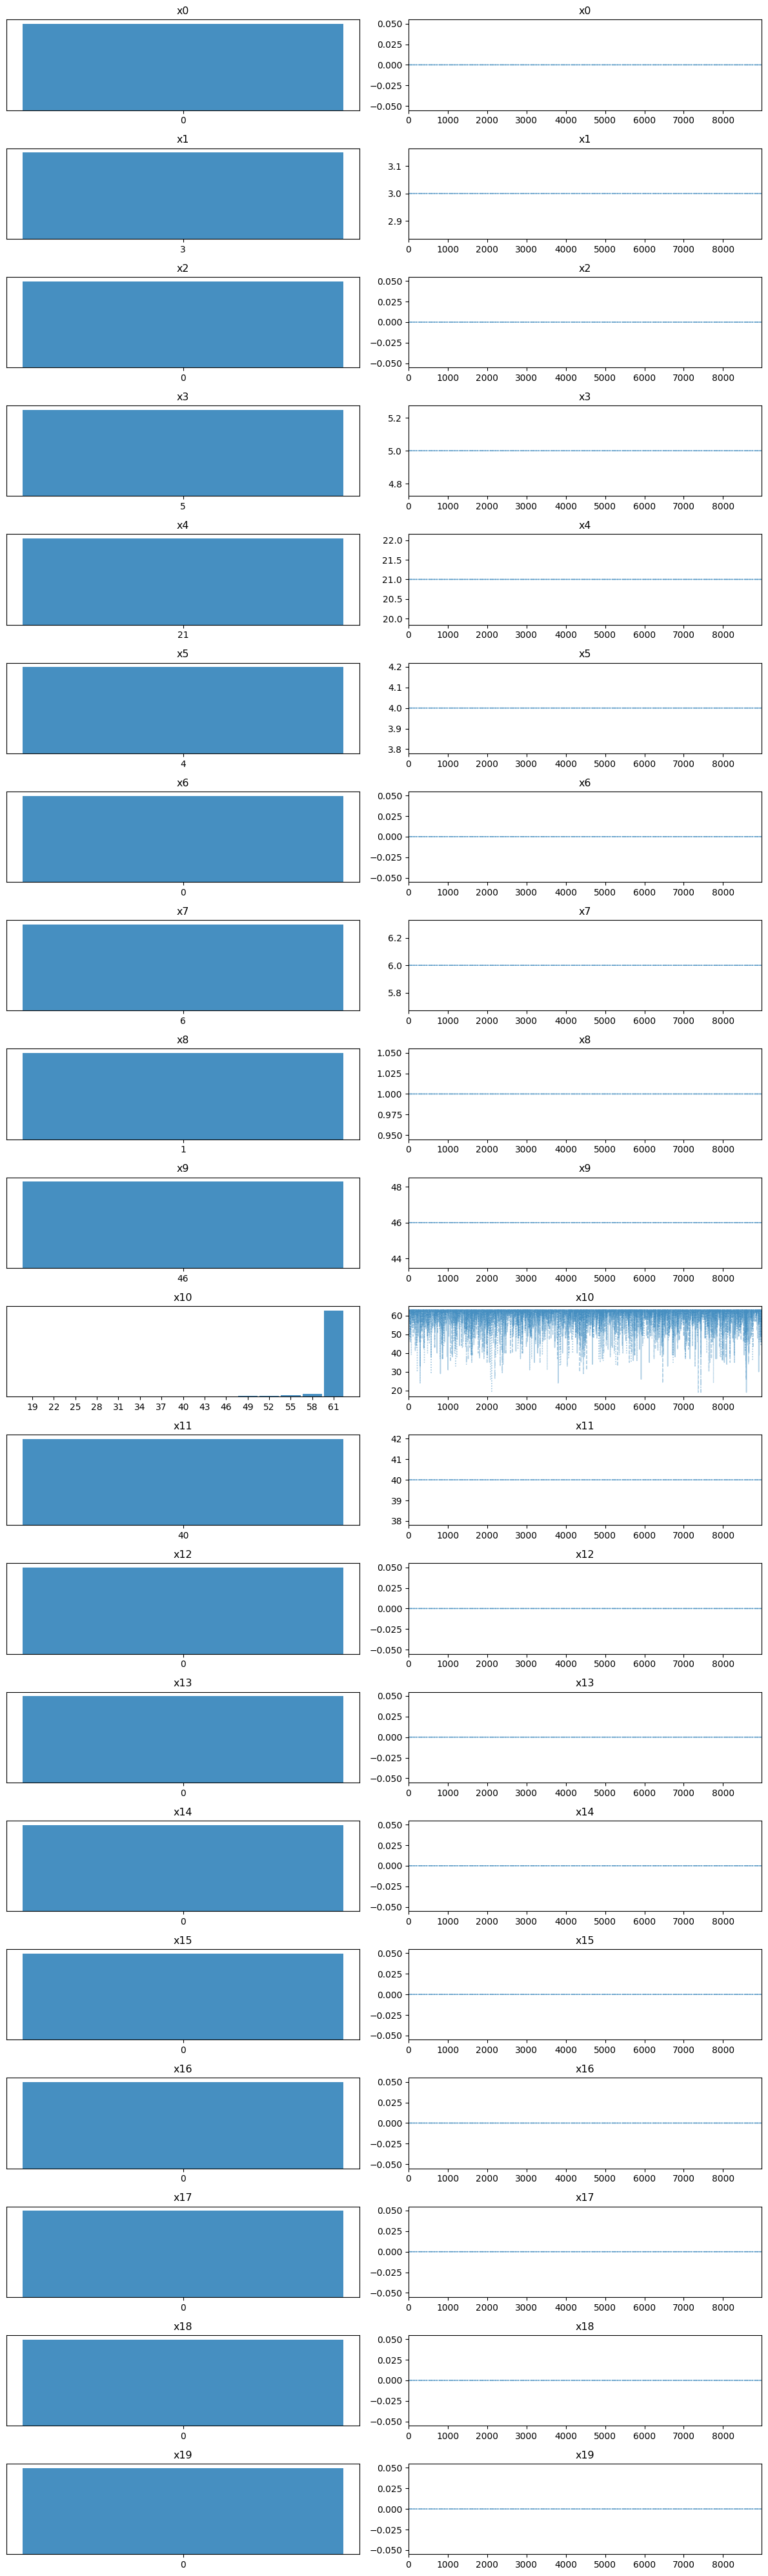

In [5]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('megasampler_trace_plot.png', dpi=150);

In [6]:
# Diagnosis
az.summary(trace)

/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/home/pardo/programs/miniconda3/envs/sat_metropolis/lib/python3.12/site-packages/arviz

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,0.000,0.000,0.0,0.0,0.000,NaN,35912.0,35912.0,NaN
x1,3.000,0.000,3.0,3.0,0.000,NaN,35912.0,35912.0,NaN
x2,0.000,0.000,0.0,0.0,0.000,NaN,35912.0,35912.0,NaN
x3,5.000,0.000,5.0,5.0,0.000,NaN,35912.0,35912.0,NaN
x4,21.000,0.000,21.0,21.0,0.000,NaN,35912.0,35912.0,NaN
...,...,...,...,...,...,...,...,...,...
x67,0.000,0.000,0.0,0.0,0.000,NaN,35912.0,35912.0,NaN
x68,0.000,0.000,0.0,0.0,0.000,NaN,35912.0,35912.0,NaN
x69,0.000,0.000,0.0,0.0,0.000,NaN,35912.0,35912.0,NaN
x70,29.534,22.824,1.0,63.0,0.121,0.045,35395.0,35912.0,1.0


In [7]:
utils.save_trace(trace, f'roads_megasampler_case_{bound}_rf_{reduction_factor}_max_int_{max_int_bv}.nc')